In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
import scipy.stats as stats     # Calculos estadisticos que no proporciona numpy

In [296]:
df = pd.read_csv('telco-churn.csv')
print(df.head(5).T)

                                 0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No

La información esta segmetada en, 
*  **Demográfico: **
*     gender = Género Masculino Femenino 
*     Rango de edad: pareja (Partner), dependiente(Dependents) y jubilado (SeniorCitizen) 

*  **Servicios: **
*    Servicio telefónico(PhoneService): 
*        - multilínea (MultipleLines)
*    Servicio de Internet(InternetService): 
*        - servicios relacionados 
*        - seguridad en línea(OnlineSecurity), 
*        - respaldo en línea(OnlineBackup)
*        - protección del dispositivo(DeviceProtection)
*        - soporte técnico(TechSupport)
*        - transmisión de TV (StreamingTV)
*        - transmisión de películas(StreamingMovies)
*  **Tipo de cuenta: **
*    Tenencia(tenure) - ¿Cuánto tiempo está el cliente en la empresa? 
*    Tipo de contrato(Contract): ¿Qué tipo de contrato tienen con una empresa? 
*      - Un Año(One year), Mensual(Month-to-month), contrato de dos años(Two year contract)
*    Facturación electrónica(PaperlessBilling): ¿el cliente es sin papel o no? 
*    Método de pago: ¿qué tipo de método de pago tiene el cliente? 
*      - Cheque enviado por correo(Mailed check), Cheque electrónico(Electronic check), Tarjeta de crédito (Automático) (Credit *        card (automatic)), Transferencia bancaria (Automático) (Bank transfer (automatic)) 
*  **Gasto:** Cargos mensuales(Monthly charges), Cargos totales(Total charges) 
*  
*  **Objetivo:** Rotación(Churn): ¿el cliente dejó la empresa o sigue en la empresa?

In [297]:
#Cantidad y nombre de columnas
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)
print('Filas: ', df.shape[0], 'column: ', df.shape[1])
print('Valores extraños: ' , df.isna().sum().values.sum())

Cantidad de Filas y columnas: (7043, 21)
Nombre columnas: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Filas:  7043 column:  21
Valores extraños:  0


#No hay valores nulos

In [298]:
# Columnas, nulos y tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [299]:
 # Hay que evaluar por que el datos TotalCharges sale como "object", si evidentemente es un monto.
print(pd.value_counts(df['TotalCharges'], sort = True))

20.2       11
           11
19.75       9
19.65       8
19.9        8
           ..
1529.45     1
2985.25     1
6849.4      1
1066.9      1
5585.4      1
Name: TotalCharges, Length: 6531, dtype: int64


In [300]:
# #Se evidencia 11 campos en blanco. Total Cargos tiene datos en blanco Se remplazaran con 0
df.TotalCharges.replace({" ": "0"},inplace=True) #Replazar 11 valores con espacios por 0
df.TotalCharges=df.TotalCharges.astype('float64') #Cambiar el tipo object a float

In [301]:
# seniorcitizen es categorica, pordemos reemplazala por  0 and 1 a yes and no
df['SeniorCitizen'].unique()
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [302]:
#Descripción estadística de los datos numéricos
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# EDA

In [303]:
# Balance de la variable de salida
print(df.shape)
print(pd.value_counts(df['Churn'], sort = True))
df.groupby('Churn').size() / len(df)

(7043, 21)
No     5174
Yes    1869
Name: Churn, dtype: int64


Churn
No     0.73463
Yes    0.26537
dtype: float64

#Hay un desbalance en la variable de salida. Hay que resolver el inconveniente.
#Tambein se nota que la tasa de rotación de la empresa es de alrededor del 26%

In [304]:
# No ocuparemos el datos del cliente.
df = df.drop(columns = ['customerID'])

df0 = df # Mantenemos el original

In [305]:
# Separamos las variables categoricas.
categorical_cols = [c for c in df.columns if (df[c].dtype == 'object'
                    or c == 'SeniorCitizen') and c != "Churn"]
print(categorical_cols)

df_categorical = df[categorical_cols].copy()
for col in categorical_cols:
    #print(df[col])
    #if df[col].nunique() == 2:
    #    df[col], _ = pd.factorize(df[col])
    #else:
    df = pd.get_dummies(df, columns=[col])

#df=df

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [306]:
df["Churn"], _ = pd.factorize(df["Churn"])
df.head().T

,0,1,2,3,4
tenure,1.00,34.00,2.00,45.00,2.00
MonthlyCharges,29.85,56.95,53.85,42.30,70.70
TotalCharges,29.85,1889.50,108.15,1840.75,151.65
Churn,0.00,0.00,1.00,0.00,1.00
gender_Female,1.00,0.00,0.00,0.00,1.00
gender_Male,0.00,1.00,1.00,1.00,0.00
SeniorCitizen_No,1.00,1.00,1.00,1.00,1.00
SeniorCitizen_Yes,0.00,0.00,0.00,0.00,0.00
Partner_No,0.00,1.00,1.00,1.00,1.00
Partner_Yes,1.00,0.00,0.00,0.00,0.00


In [307]:
df.corr()['Churn'].sort_values(ascending = False)#Get Correlation of "Churn"

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen_Yes                          0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

In [308]:
correlated_features = set()  
correlation_matrix = df.corr()

In [309]:
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_features.add(colname)
            correlated_features.add(colname2)

In [310]:
correlated_features

{'Dependents_No',
 'Dependents_Yes',
 'DeviceProtection_No internet service',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MonthlyCharges',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'Partner_No',
 'Partner_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'SeniorCitizen_No',
 'SeniorCitizen_Yes',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'tenure'}

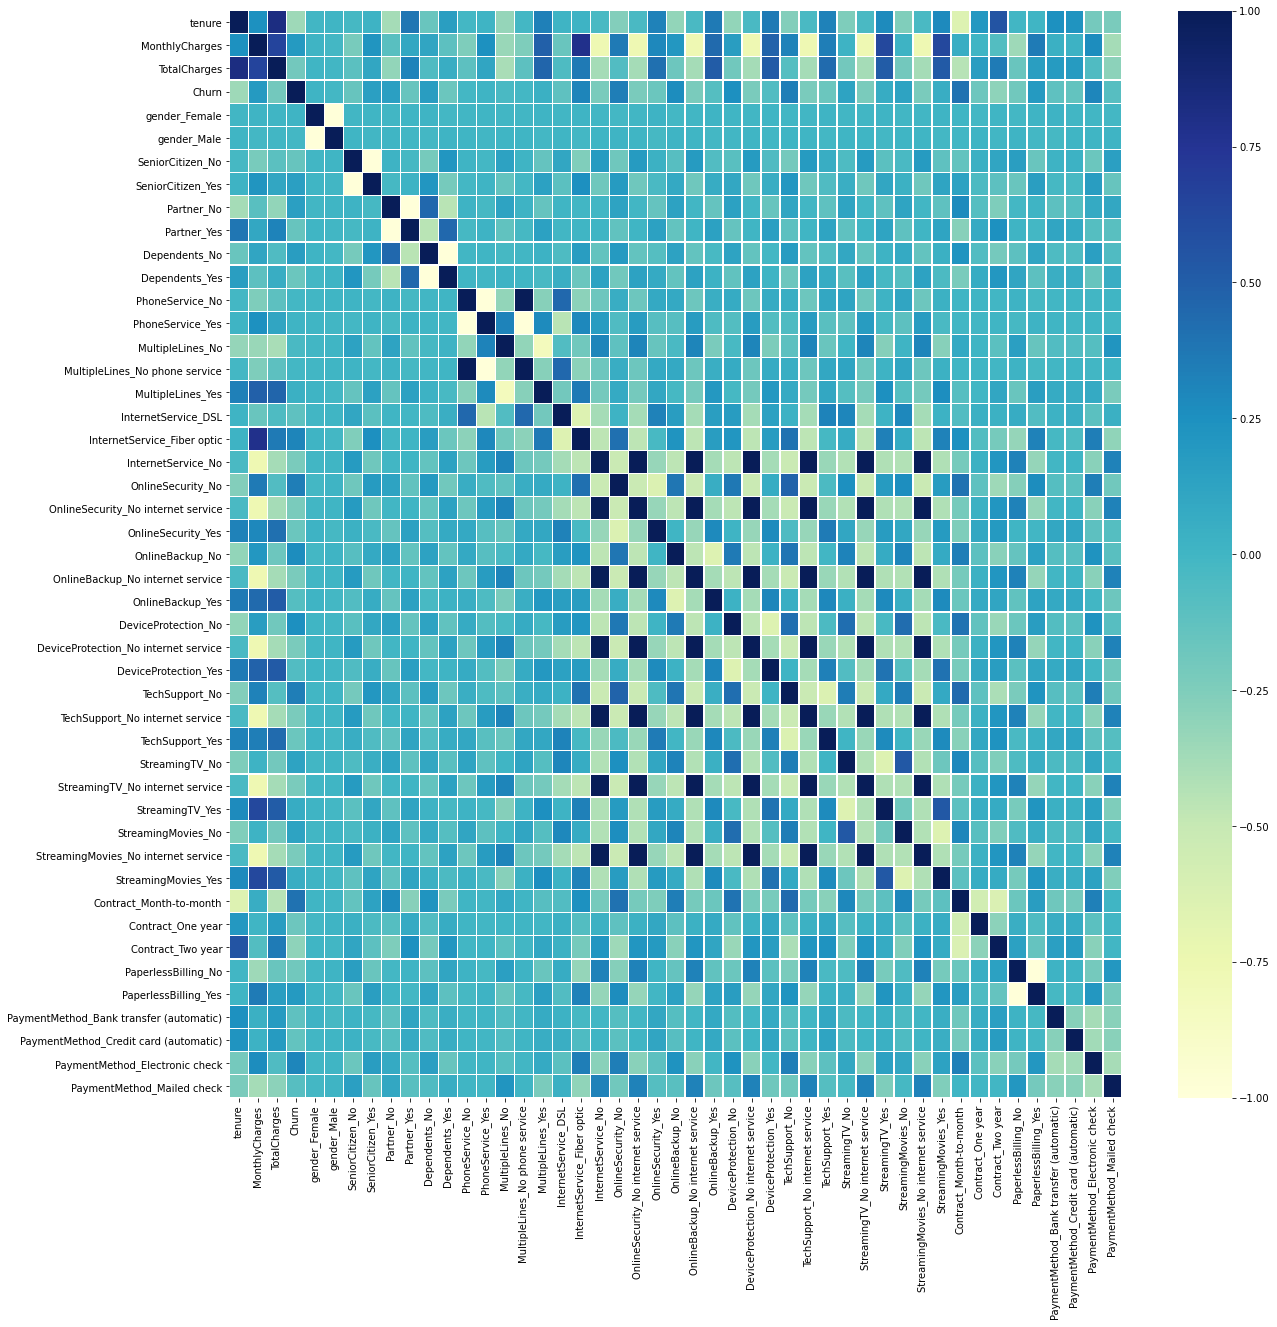

In [311]:
# Obtener correlaciones
#f,ax = plt.subplots(figsize=(20,20))
#sb.heatmap(df.corr(method='spearman'),annot=True,fmt=".1f",linewidths=2,ax=ax, cmap="YlGnBu")
plt.figure(figsize=(20, 20)) 
#corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sb.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [312]:
# Se nota en el mapa que estas caracteristicas no aportan valor
redundant_columns=df.columns[df.columns.str.contains('No internet service')].tolist()
df.drop(columns=redundant_columns,inplace=True)
df = df.drop(columns = ['MultipleLines_No phone service','MultipleLines_No','OnlineSecurity_No','OnlineBackup_No'\
                       ,'DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'])
df.columns.size

33

In [313]:
# Revisamos nuevamente la correlación
df.corr()['Churn'].sort_values(ascending = False)#Get Correlation of "Churn"

Churn                                      1.000000
Contract_Month-to-month                    0.405103
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen_Yes                          0.150889
Partner_No                                 0.150448
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Female                              0.008612
gender_Male                               -0.008612
PhoneService_No                           -0.011942
DeviceProtection_Yes                      -0.066160
OnlineBackup_Yes                          -0.082255
PaymentMethod_Mailed check                -0.091683
PaymentMetho

In [314]:
correlated_features = set()  
correlation_matrix = df.corr()

In [315]:
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_features.add(colname)
            correlated_features.add(colname2)

In [316]:
correlated_features

{'Dependents_No',
 'Dependents_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MonthlyCharges',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'Partner_No',
 'Partner_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'SeniorCitizen_No',
 'SeniorCitizen_Yes',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'tenure'}

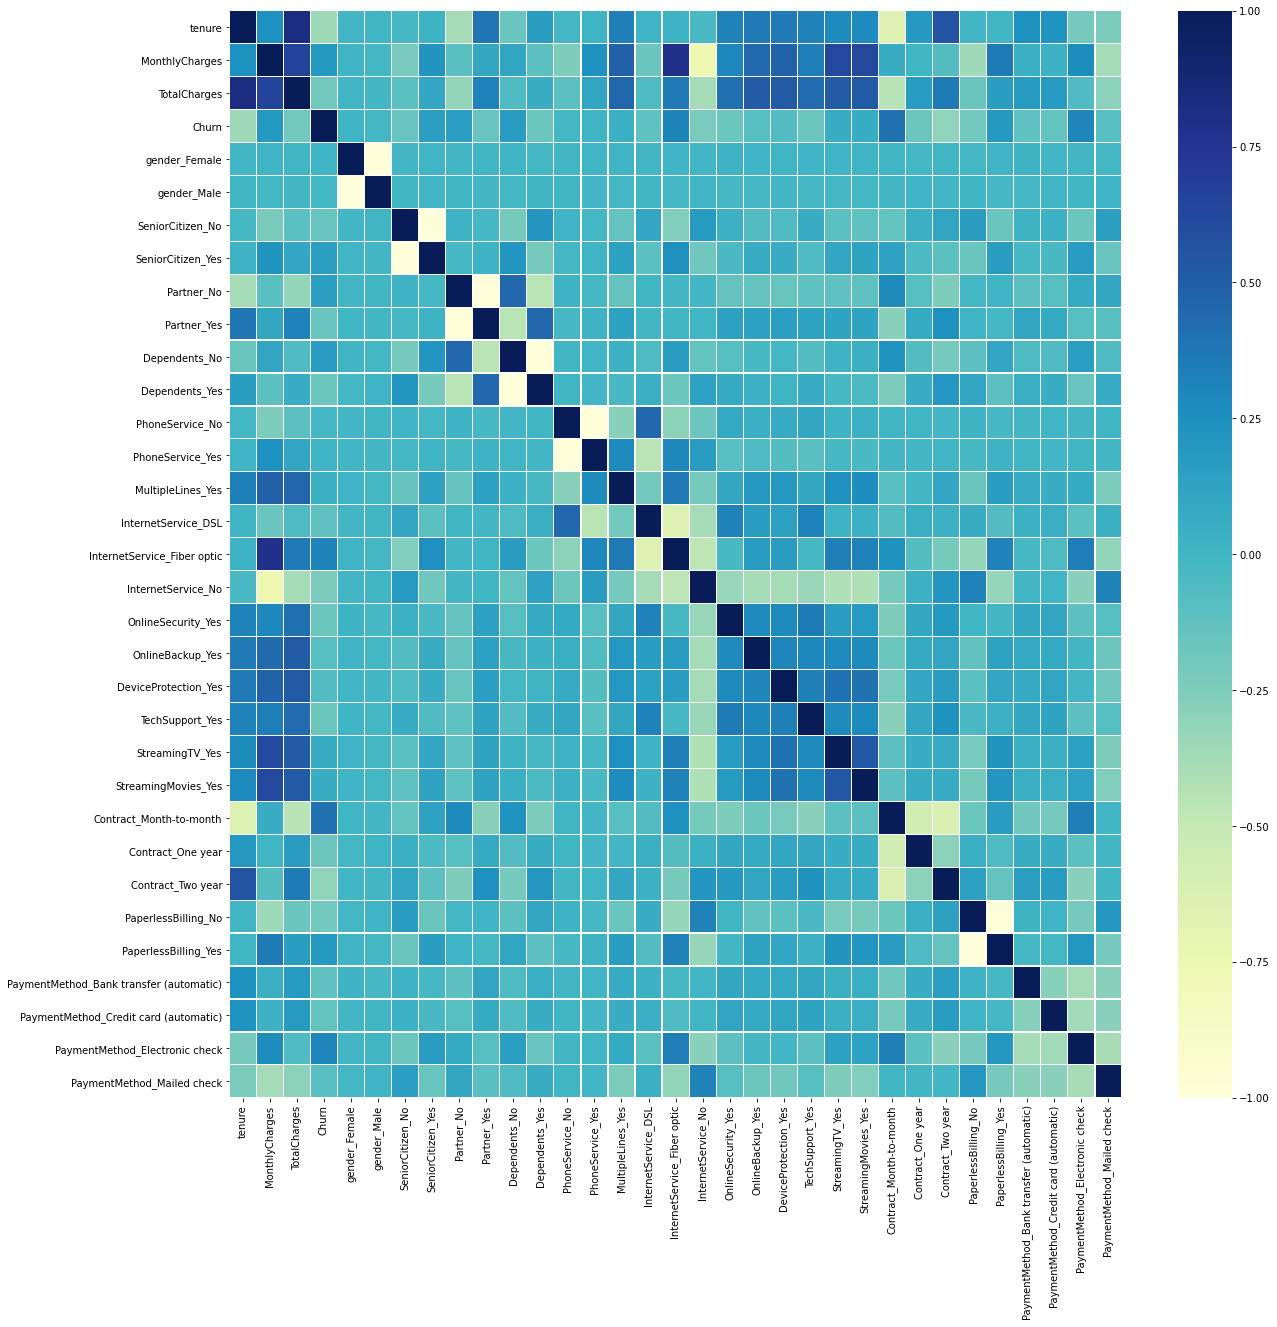

In [317]:
# Obtener correlaciones
#f,ax = plt.subplots(figsize=(20,20))
#sb.heatmap(df.corr(method='spearman'),annot=True,fmt=".1f",linewidths=2,ax=ax, cmap="YlGnBu")
plt.figure(figsize=(20, 20)) 
#corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sb.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, 
                 linewidths=.2, cmap="YlGnBu")

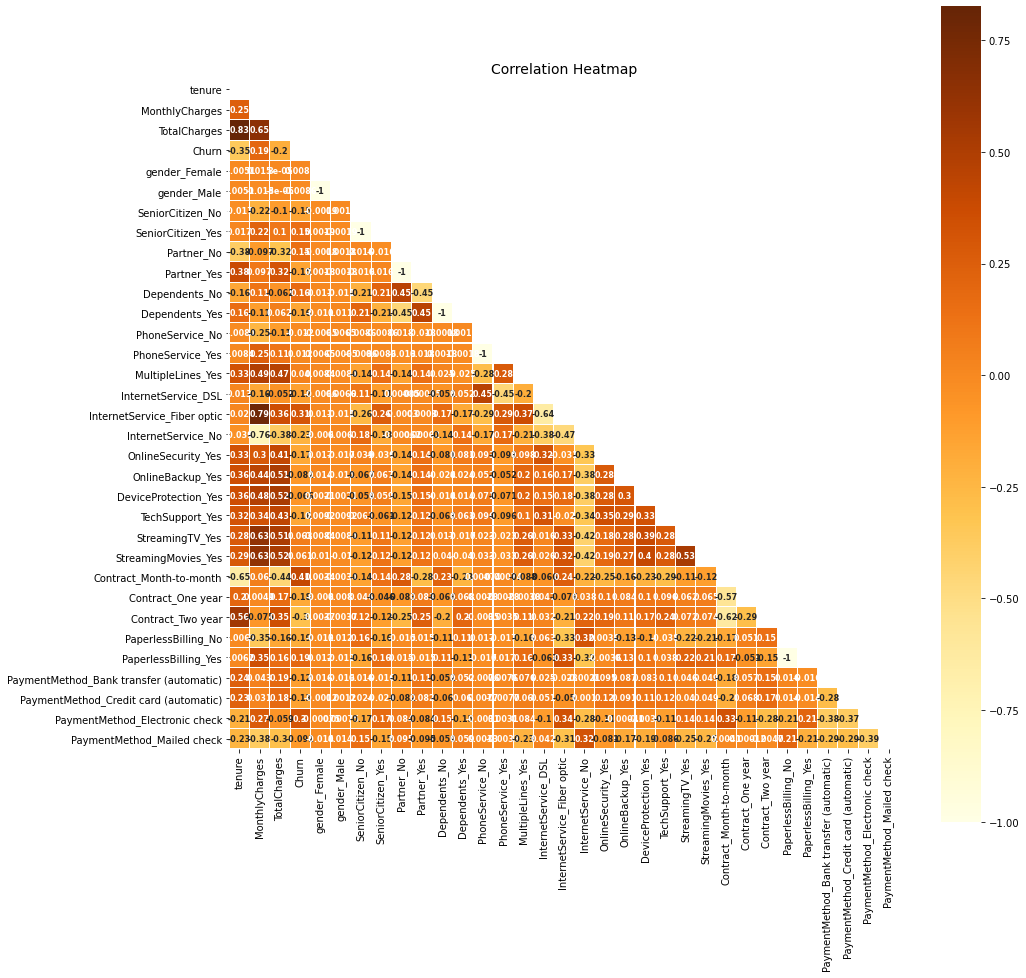

In [320]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(15,15))
    sb.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 8, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()
#var_corr = round(df_cal.corr(),2)
Generate_heatmap_graph(correlation_matrix
                       ,chart_title = 'Mapa de Correlación'
                       ,mask_uppertri = True)

#De la matriz de correlación, características como la tenure, MontlhyCharges y TotalCharges están altamente correlacionados con servicios como MultipleLines y *Internet services* like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV y StreamingMovies.

Data Understanding
1 Correlation with churn
Contract monthly, absence of online security and tech support seem to be positively correlated with churn.
Tenure, two year contracts and services such as Online security, Tech support, Online backup, Device protection seem to be negatively related to churn.
'gender','StreamingMovies_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes' seem to no difference

# Distribución de variables categóricas y binarias por objetivo (Churn vrs no Churn)

D:\Personal\Anaconda\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


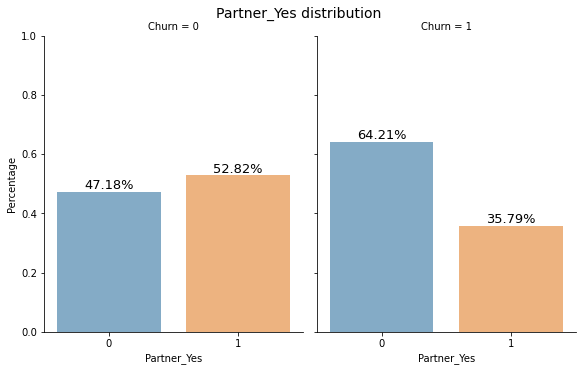

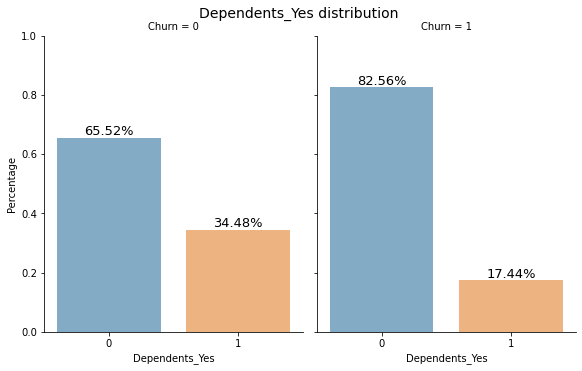

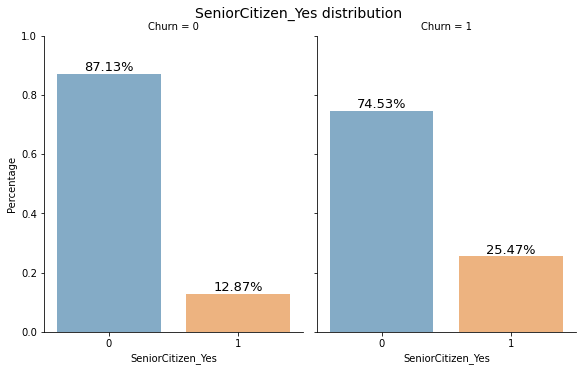

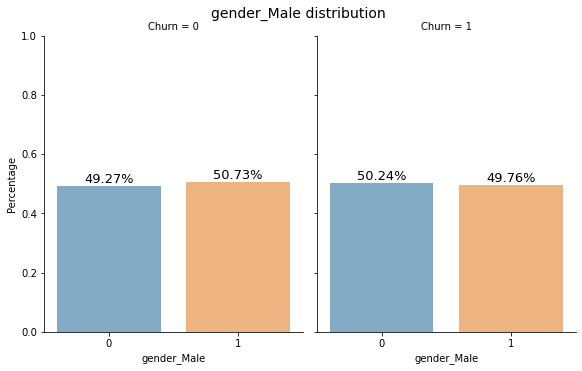

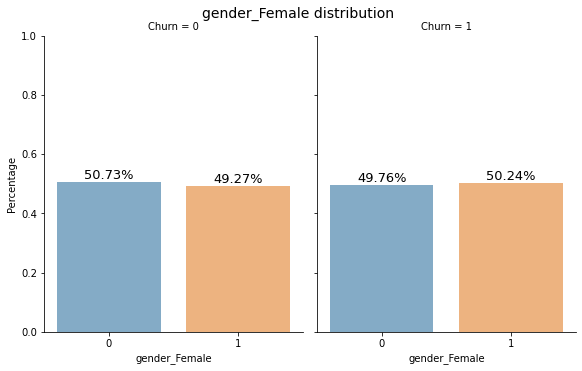

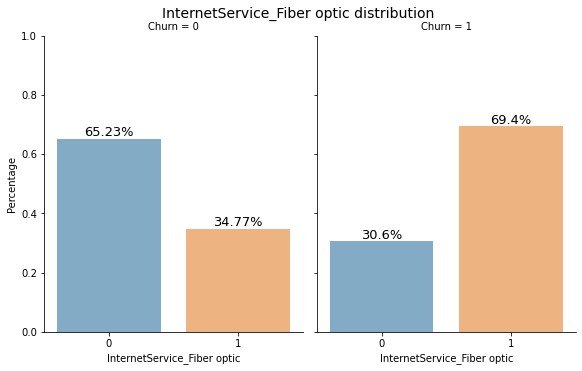

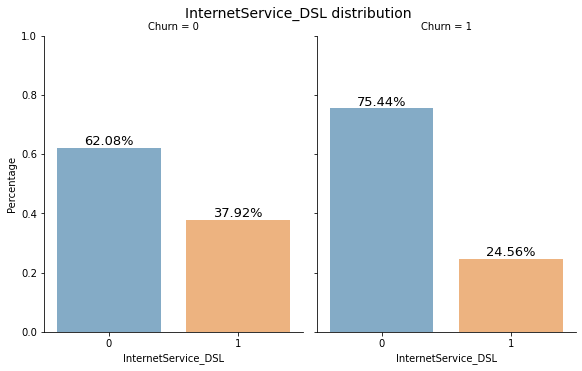

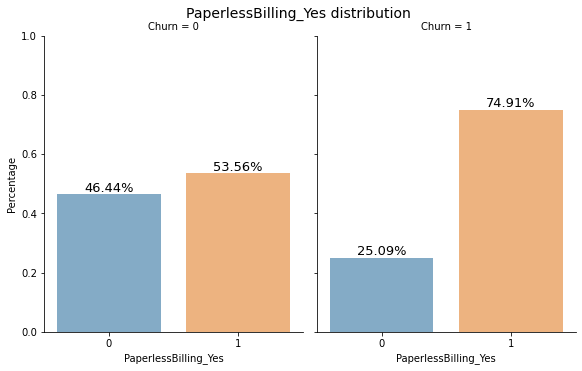

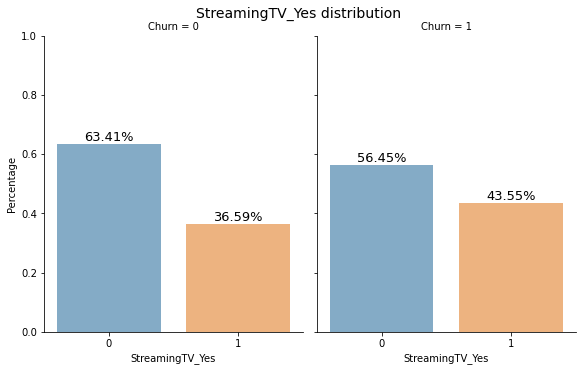

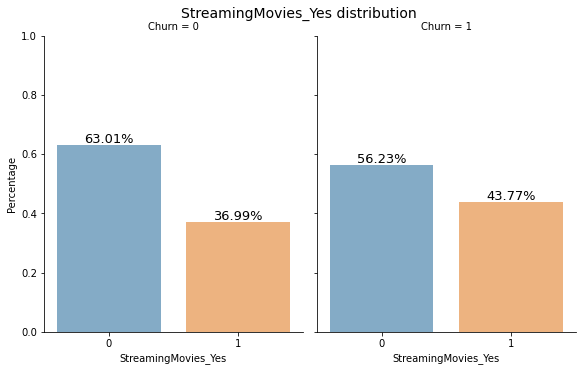

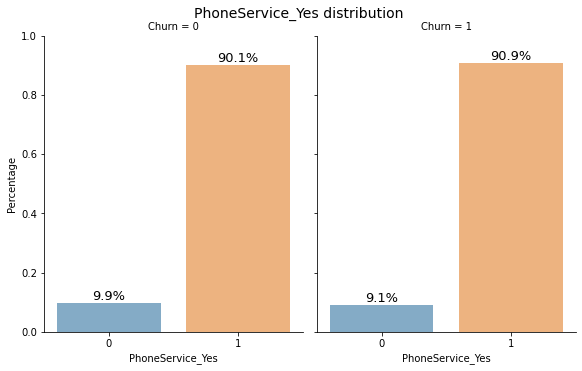

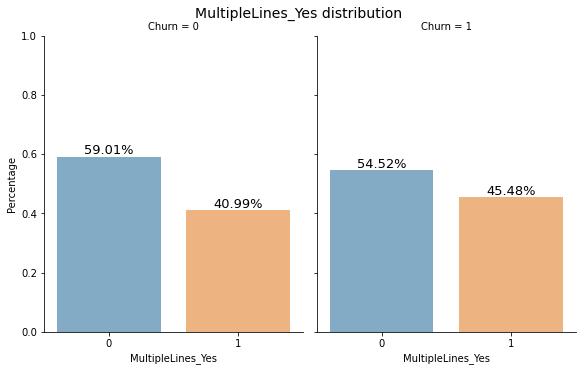

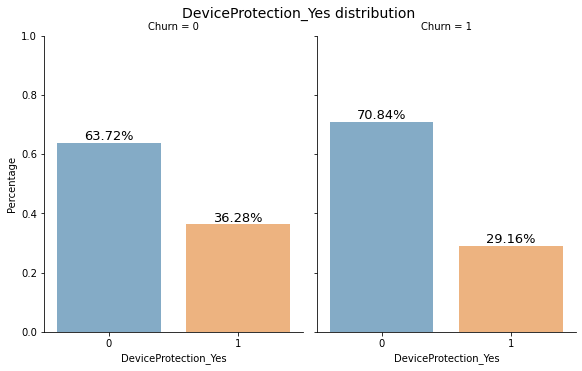

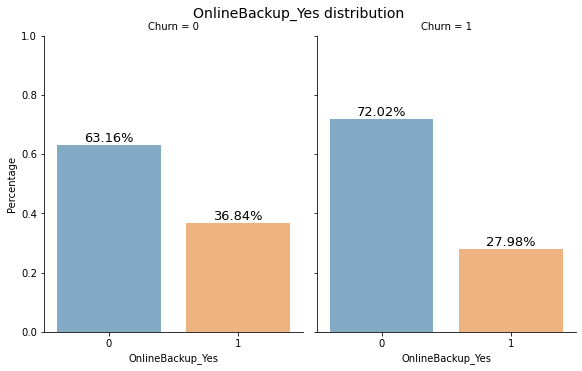

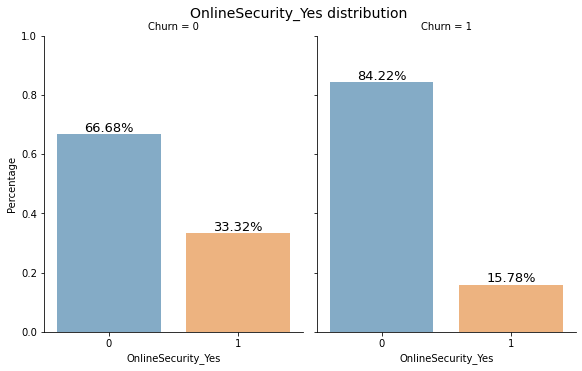

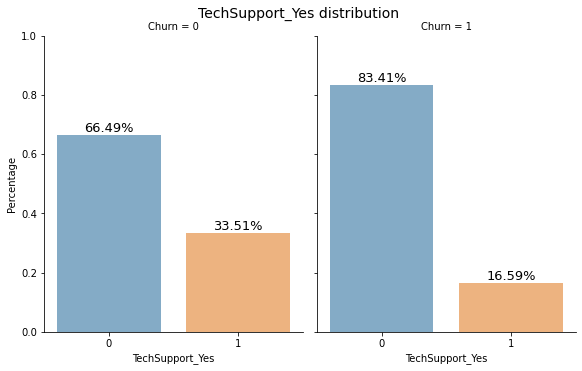

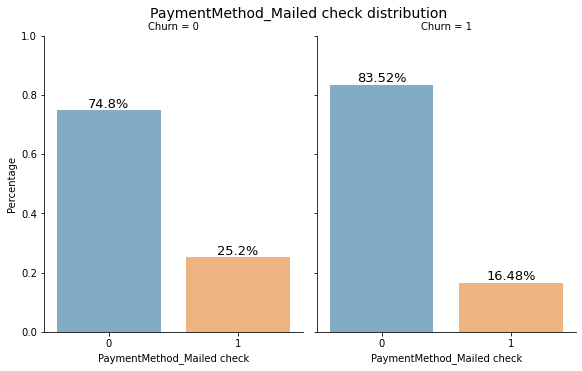

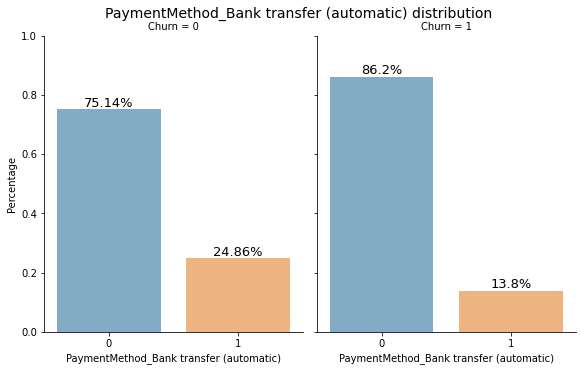

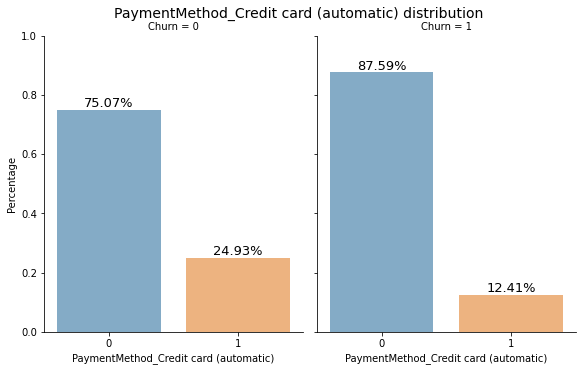

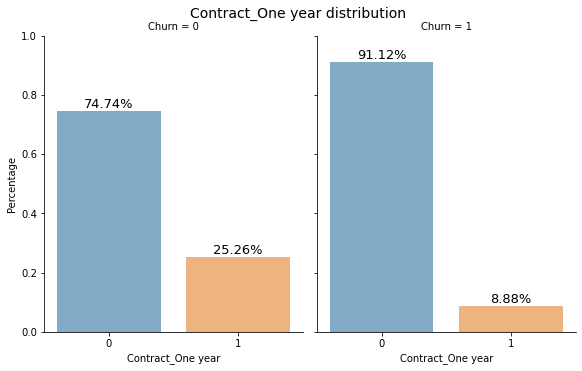

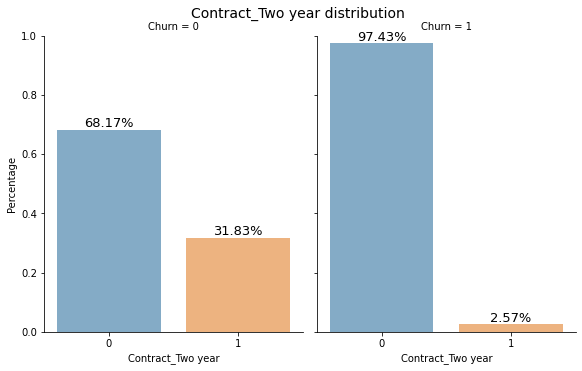

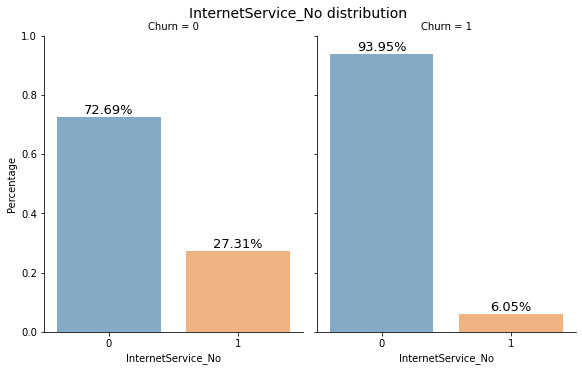

In [342]:
def Create_data_label(ax):
    """ Display data label for given axis """
    for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/ 2
                    , bar.get_height() + 0.01
                    , str(round(100 * bar.get_height(),2)) + '%'
                    , ha = 'center'
                    , fontsize = 13)
            
            
def Categorical_var_churn_dist(data, cols, distribution_col):
    """ Distribution of categorical variable based on target variable """
    
    for i,feature in enumerate(cols):
        
        feature_summary = data[feature].value_counts(normalize=True).reset_index(name='Percentage')
        
        plt_cat = sb.catplot(x=feature
                , y='Percentage'
                , data = feature_summary
                , col=distribution_col
                , kind='bar'
                , aspect = 0.8
                , alpha = 0.6)
        
        if (str.find('PaymentMethod',feature) >= 0): #== 'PaymentMethod':
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right')
        
        
        for ax1, ax2 in plt_cat.axes:
            Create_data_label(ax1)
            Create_data_label(ax2)
        
        
        plt.ylim(top=1)
        plt.subplots_adjust(top = 0.9)
        plt.gcf().suptitle(feature+" distribution",fontsize=14)
    plt.show()
churn_summary = df.groupby('Churn')
cat_cols = ['Partner_Yes','Dependents_Yes','SeniorCitizen_Yes','gender_Male','gender_Female',
            'InternetService_Fiber optic','InternetService_DSL',
            'PaperlessBilling_Yes','StreamingTV_Yes','StreamingMovies_Yes',
            'PhoneService_Yes','MultipleLines_Yes',
            'DeviceProtection_Yes','OnlineBackup_Yes','OnlineSecurity_Yes','TechSupport_Yes',
            'PaymentMethod_Mailed check',
            'PaymentMethod_Bank transfer (automatic)',
            'PaymentMethod_Credit card (automatic)',
            'Contract_One year','Contract_Two year','InternetService_No']
            #'Partner_No','Dependents_No','SeniorCitizen_No','PhoneService_No','InternetService_No','PaperlessBilling_No']
Categorical_var_churn_dist(churn_summary, cat_cols,'Churn')

#Es probable que los clientes que roten no tener pareja ni dependientes; lo que implica que probablemente sea soltero. 
* Cuentan con servicio de Internet y específicamente fibra óptica 
* No tienen seguridad en línea, respaldo en línea, protección de dispositivos, soporte técnico 
* Tener servicios de transmisión de TV y películas en tiempo real 
* Estan con plan mensual 
* Tienen facturación electrónica 
* Tiene método de pago con cheque electrónico

In [82]:
import csv

In [86]:
df.to_csv('\Users\OREAMUNOAE\Desktop\Maestria\WA_Fn-UseC_-Telco-Customer-Churn_lasso.csv',)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<ipython-input-86-7780cc1fe67f>, line 1)

In [87]:
correlated_features = set()  
correlation_matrix = df.corr()

In [88]:
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_features.add(colname)
            correlated_features.add(colname2)

In [89]:
print(correlated_features)

{'tenure', 'TotalCharges', 'InternetService_No', 'InternetService_Fiber optic', 'MonthlyCharges'}


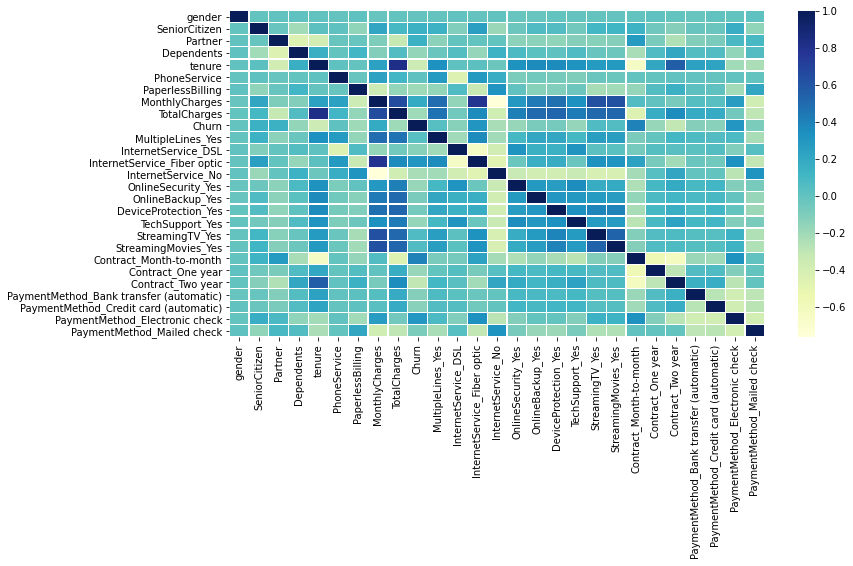

In [90]:
plt.figure(figsize=(12, 6)) 
#corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sb.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, 
                 linewidths=.2, cmap="YlGnBu")
#Get Correlation

In [93]:
X = df.loc[:, df.columns != 'Churn'].values
y = df['Churn'].values

# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [94]:
###############################################################################

# ANN Build

###############################################################################

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


def create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay):
    """
    Funcion para crear una NN para clasificacion binaria usando 2 HL
    
    """
    
    
    # Initialising the ANN
    model = Sequential()
    
    # First HL
    # [batch_size x n_features] x [n_features x w_in]
    model.add(Dense(units = w_in, input_dim = n_features, 
                    kernel_initializer = 'normal', 
                    activation = 'relu')) 
    # Second HL
    # [batch_size x w_in] x [w_in x w_h1]
    model.add(Dense(units = w_h1, input_dim = w_in, 
                    kernel_initializer = 'normal', 
                    activation = 'relu'))
    
    # Output Layer
    # [batch_size x w_h1] x [w_h1 x w_out]
    model.add(Dense(units = n_var_out, 
                    kernel_initializer = 'normal', 
                    activation = 'sigmoid')) 
    
    # Compile Model
    # Loss Function -> Cross Entropy (Binary)
    # Optimizer -> sgd, adam...
    if optimizer == 'sgd':
        keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    else:
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    return model


In [95]:
## fix random seed for reproducibility
#from tensorflow import set_random_seed
#from numpy.random import seed
#value = 7
#seed(value)
#set_random_seed(value)


# Parametros
n_features = np.shape(X_train)[1]
w_in = 12
w_h1 = 8
n_var_out = 1
batch_size = 100
nb_epochs = 100
optimizer = 'adam'
lr = 0.1
momentum = 0.01
decay = 0.0

# Create NN
model = create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay)
    
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs)

Epoch 1/100
53/53 [==============================] - 1s 767us/step - loss: 0.6906 - accuracy: 0.6095
Epoch 2/100
53/53 [==============================] - 0s 806us/step - loss: 0.6779 - accuracy: 0.7363
Epoch 3/100
53/53 [==============================] - 0s 786us/step - loss: 0.6596 - accuracy: 0.7927
Epoch 4/100
53/53 [==============================] - 0s 748us/step - loss: 0.6411 - accuracy: 0.8009
Epoch 5/100
53/53 [==============================] - 0s 786us/step - loss: 0.6260 - accuracy: 0.7914
Epoch 6/100
53/53 [==============================] - 0s 767us/step - loss: 0.6115 - accuracy: 0.8039
Epoch 7/100
53/53 [==============================] - 0s 825us/step - loss: 0.5985 - accuracy: 0.7978
Epoch 8/100
53/53 [==============================] - 0s 863us/step - loss: 0.5932 - accuracy: 0.7924
Epoch 9/100
53/53 [==============================] - 0s 824us/step - loss: 0.5779 - accuracy: 0.8060
Epoch 10/100
53/53 [==============================] - 0s 1ms/step - loss: 0.5689 - accuracy

53/53 [==============================] - 0s 863us/step - loss: 0.3922 - accuracy: 0.8122
Epoch 82/100
53/53 [==============================] - 0s 767us/step - loss: 0.3961 - accuracy: 0.8140
Epoch 83/100
53/53 [==============================] - 0s 824us/step - loss: 0.3901 - accuracy: 0.8188
Epoch 84/100
53/53 [==============================] - 0s 786us/step - loss: 0.3904 - accuracy: 0.8138
Epoch 85/100
53/53 [==============================] - 0s 767us/step - loss: 0.3915 - accuracy: 0.8118
Epoch 86/100
53/53 [==============================] - 0s 729us/step - loss: 0.3852 - accuracy: 0.8186
Epoch 87/100
53/53 [==============================] - 0s 786us/step - loss: 0.3848 - accuracy: 0.8175
Epoch 88/100
53/53 [==============================] - 0s 748us/step - loss: 0.3890 - accuracy: 0.8124
Epoch 89/100
53/53 [==============================] - 0s 709us/step - loss: 0.3947 - accuracy: 0.8167
Epoch 90/100
53/53 [==============================] - 0s 729us/step - loss: 0.3794 - accuracy: 

In [97]:
###############################################################################

# ANN Predictions

###############################################################################

# Predict
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [98]:
print(cm)

[[1141  157]
 [ 211  252]]


In [99]:
scores = model.evaluate(X_train, X_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 5282
  y sizes: 1761
Make sure all arrays contain the same number of samples.

In [46]:
# Hay que transformar a numéricas las variables categóricas para poder trabajar con ellas
obj_df = df.select_dtypes(include=['object']).copy() # se eligen las variables categoricas (object)
print(obj_df.columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [47]:
#sb.catplot('gender',data=df,kind="count", aspect=3)
#gender[['gender', 'top']].groupby(['gender'], as_index=False).agg(['mean', 'count', 'sum'])
#df[['gender','Churn']].groupby(['gender'], as_index=False).agg(['count'])
#df[['Partner','Churn']].groupby(['Partner'], as_index=False).agg(['count'])

obj_df = df.select_dtypes(include=['object']).copy() # se eligen las variables categoricas (object)
#print(obj_df.columns)
x = obj_df.drop(columns=["Churn"])#.values
#print(x)
for col in x.columns:
    print(df[[col,'Churn']].groupby([col], as_index=False).agg(['count']))
    #dataset_mat[col] = lb_encoder.fit_transform(dataset_mat[col]
                                              

           Churn
           count
customerID      
0002-ORFBO     1
0003-MKNFE     1
0004-TLHLJ     1
0011-IGKFF     1
0013-EXCHZ     1
...          ...
9987-LUTYD     1
9992-RRAMN     1
9992-UJOEL     1
9993-LHIEB     1
9995-HOTOH     1

[7043 rows x 1 columns]
       Churn
       count
gender      
Female  3488
Male    3555
        Churn
        count
Partner      
No       3641
Yes      3402
           Churn
           count
Dependents      
No          4933
Yes         2110
             Churn
             count
PhoneService      
No             682
Yes           6361
                 Churn
                 count
MultipleLines         
No                3390
No phone service   682
Yes               2971
                Churn
                count
InternetService      
DSL              2421
Fiber optic      3096
No               1526
                    Churn
                    count
OnlineSecurity           
No                   3498
No internet service  1526
Yes                  2

# La mayoria de variables son categoricas. Se podrían Mapear.

In [51]:
# Mapeo de variables Categoricas
df['gender_code'] = df['gender'].map({'Female': 1,'Male': 2}).astype(int)
df['Partner_code'] = df['Partner'].map({'Yes': 1,'No': 2}).astype(int)
df['Dependents_code'] = df['Dependents'].map({'Yes': 1,'No': 2}).astype(int)
df['PhoneService_code'] = df['PhoneService'].map({'Yes': 1,'No': 2}).astype(int)
df['MultipleLines_code'] = df['MultipleLines'].map({'Yes': 1,'No': 2, 'No phone service': 3}).astype(int)
df['InternetService_code'] = df['InternetService'].map({'DSL': 1,'Fiber optic': 2, 'No': 3}).astype(int)
df['OnlineSecurity_code'] = df['OnlineSecurity'].map({'Yes': 1,'No': 2, 'No internet service': 3}).astype(int)
df['OnlineBackup_code'] = df['OnlineBackup'].map({'Yes': 1,'No': 2, 'No internet service': 3}).astype(int)
df['DeviceProtection_code'] = df['DeviceProtection'].map({'Yes': 1,'No': 2, 'No internet service': 3}).astype(int)
df['TechSupport_code'] = df['TechSupport'].map({'Yes': 1,'No': 2, 'No internet service': 3}).astype(int)
df['StreamingTV_code'] = df['StreamingTV'].map({'Yes': 1,'No': 2, 'No internet service': 3}).astype(int)
df['StreamingMovies_code'] = df['StreamingMovies'].map({'Yes': 1,'No': 2, 'No internet service': 3}).astype(int)
df['Contract_code'] = df['Contract'].map({'Month-to-month': 1,'One year': 2, 'Two year': 3}).astype(int)
df['PaperlessBilling_code'] = df['PaperlessBilling'].map({'Yes': 1,'No': 2}).astype(int)
df['Churn_code'] = df['Churn'].map({'Yes': 1,'No': 2}).astype(int)
df['PaymentMethod_code'] = df['PaymentMethod'].map({'Bank transfer (automatic)': 1,'Credit card (automatic)': 2, 
                                                    'Electronic check': 3,'Mailed check': 4}).astype(int)


In [52]:
#Obtenemos un nuevo conjunto de datos para revisar correlaciones y distribuciones.
ElementosABorrar = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','Contract',
                    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract_code','PaymentMethod',
                    'PaperlessBilling','Churn']
df_mapeado = df.drop(ElementosABorrar, axis = 1)


In [53]:
df_mapeado.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_code,Partner_code,Dependents_code,PhoneService_code,MultipleLines_code,InternetService_code,OnlineSecurity_code,OnlineBackup_code,DeviceProtection_code,TechSupport_code,StreamingTV_code,StreamingMovies_code,PaperlessBilling_code,PaymentMethod_code,Churn_code
0,7590-VHVEG,0,1,29.85,29.85,1,1,2,2,3,1,2,1,2,2,2,2,1,3,2
1,5575-GNVDE,0,34,56.95,1889.5,2,2,2,1,2,1,1,2,1,2,2,2,2,4,2
2,3668-QPYBK,0,2,53.85,108.15,2,2,2,1,2,1,1,1,2,2,2,2,1,4,1
3,7795-CFOCW,0,45,42.30,1840.75,2,2,2,2,3,1,1,2,1,1,2,2,2,1,2
4,9237-HQITU,0,2,70.70,151.65,1,2,2,1,2,2,2,2,2,2,2,2,1,3,1


In [61]:
df_mapeado_stats_df = df_mapeado.describe().T
# Calculamos la asimetría
skew_values = list()
for num_col in df_mapeado_stats_df.index:
    num_col_skew = stats.skew(df_mapeado[num_col])
    skew_values.append(num_col_skew)
df_mapeado_stats_df['skew'] = skew_values
df_mapeado_stats_df

,count,mean,std,min,25%,50%,75%,max,skew
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00,1.833242
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00,0.239489
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75,-0.220477
gender_code,7043.0,1.504756,0.500013,1.00,1.0,2.00,2.00,2.00,-0.019027
Partner_code,7043.0,1.516967,0.499748,1.00,1.0,2.00,2.00,2.00,-0.067908
Dependents_code,7043.0,1.700412,0.458110,1.00,1.0,2.00,2.00,2.00,-0.875012
PhoneService_code,7043.0,1.096834,0.295752,1.00,1.0,1.00,1.00,2.00,2.726572
MultipleLines_code,7043.0,1.674996,0.642730,1.00,1.0,2.00,2.00,3.00,0.422094
InternetService_code,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00,0.205380
OnlineSecurity_code,7043.0,1.930001,0.706051,1.00,1.0,2.00,2.00,3.00,0.099501


ValueError: num must be 1 <= num <= 15, not 16

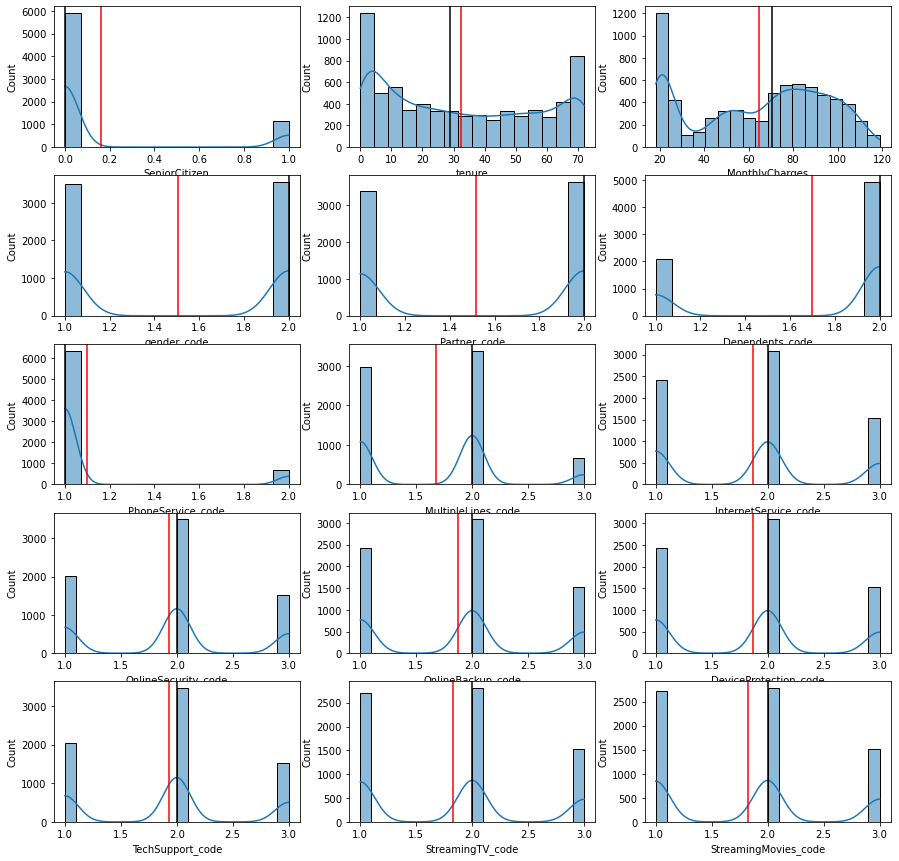

In [63]:
# Histograma para representar la evolución de las variables
fig = plt.figure(figsize=(15,15))

for i, num_col in enumerate(df_mapeado_stats_df.index):
    fig.add_subplot(5,3,1+i)
    sb.histplot(x=df_mapeado[num_col], kde=True)
    
    mean_value = df_mapeado[num_col].mean()  # Media
    plt.axvline(x=mean_value, c='red')
    
    median_value = df_mapeado[num_col].median() # Mediana
    plt.axvline(x=median_value, c='black')

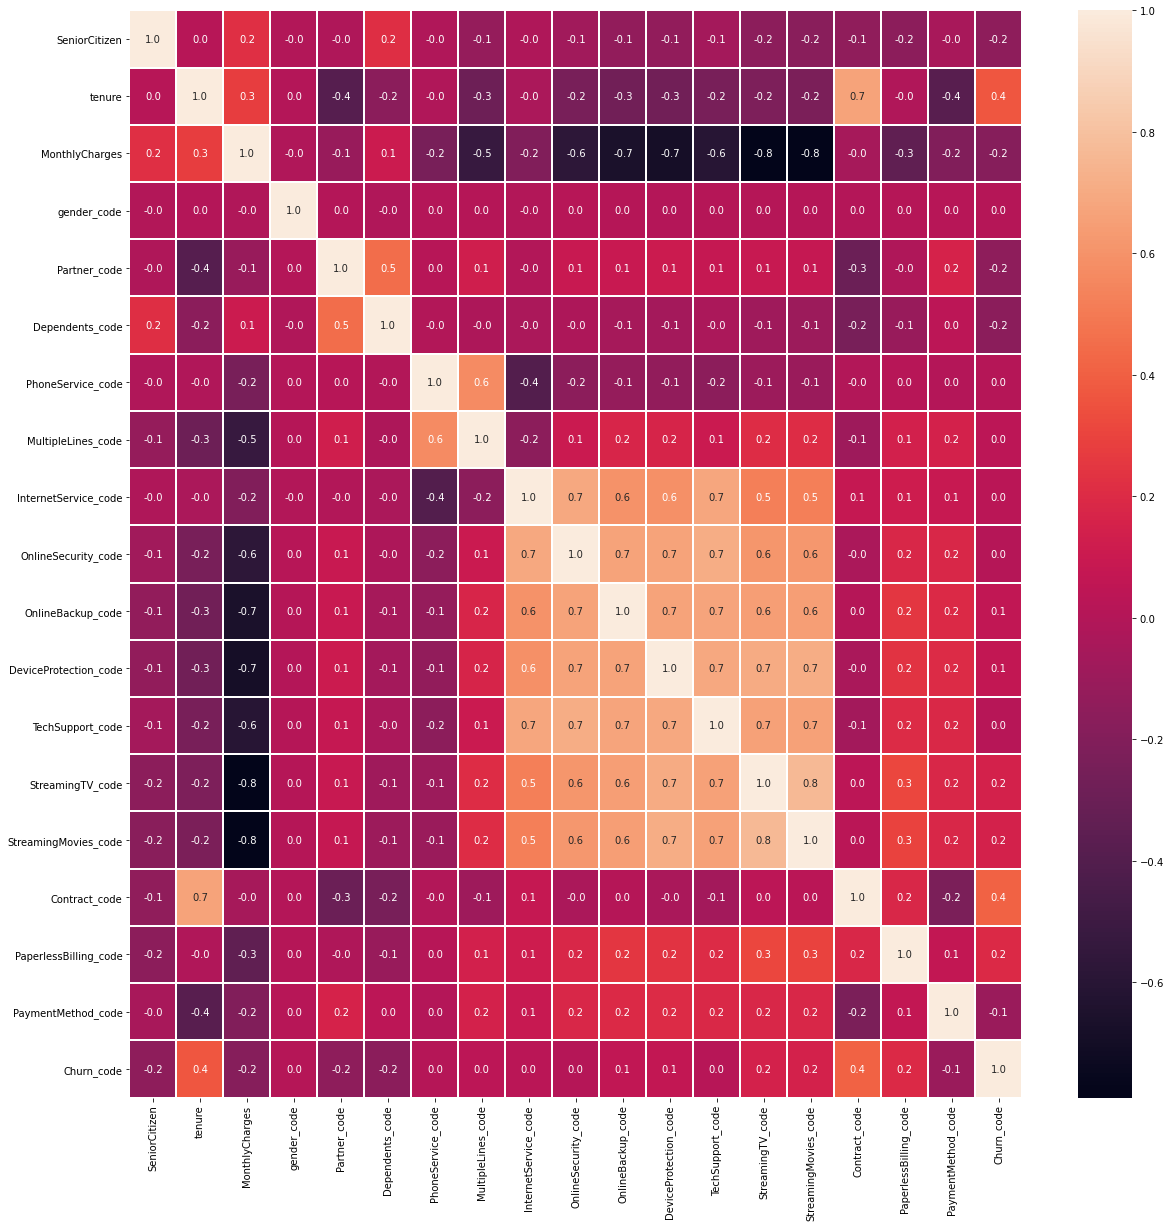

In [57]:
# Correlación entre variables
f,ax = plt.subplots(figsize=(20,20))
sb.heatmap(df.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()